# Does the Star Wars fandom consider the original trilogy better than the newer version ?

Do the original 3 Star Wars films compare better or worse than the trilogy released in the mid 2000's. Based off the responses to a Star Wars survey we try to asses what movie goers and fans of the Star Wars franchise feel about the 6 Star Wars films released between 1977 and 2005.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars.shape

(1187, 38)

In [5]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

#### Preliminary dataset cleaning, response and column mapping to improve readability

The dataset contains multiple columns which pose "Yes/No" questions, to improve readability we map those responses into boolean values. Mapping to boolean also makes working with the responses easier.
Some of the column names are also very wordy, we can shorten them to make it easier to work with them.

In [6]:
mapping = {"Yes": True, "No": False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(mapping)

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(mapping)

In [7]:
mapped_film_names = {"Star Wars: Episode I  The Phantom Menace": True,
                     "Star Wars: Episode II  Attack of the Clones": True,
                     "Star Wars: Episode III  Revenge of the Sith": True,
                     "Star Wars: Episode IV  A New Hope": True,
                     "Star Wars: Episode V The Empire Strikes Back": True,
                     "Star Wars: Episode VI Return of the Jedi": True,
                     np.NaN: False}

In [8]:
mapped_columns = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                  'Unnamed: 4': 'seen_2',
                  'Unnamed: 5': "seen_3",
                  'Unnamed: 6': "seen_4",
                 'Unnamed: 7': "seen_5",
                 'Unnamed: 8': "seen_6"}

In [9]:
for each in star_wars.columns[3:9]:
    star_wars[each] = star_wars[each].map(mapped_film_names)
    
star_wars = star_wars.rename(columns=mapped_columns)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [11]:
mapped_ranking = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_for_1",
        "Unnamed: 10": "ranking_for_2",
        "Unnamed: 11": "ranking_for_3",
        "Unnamed: 12": "ranking_for_4",
        "Unnamed: 13": "ranking_for_5",
        "Unnamed: 14": "ranking_for_6"}

star_wars = star_wars.rename(columns=mapped_ranking)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_for_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


#### Which movie was ranked the highest amongst the 6 by the viewers?

Based off user ranking, we can determine which of the 6 movies in the franchise so far were regarded as the best.

In [12]:
ranking_means = star_wars.iloc[:,9:15].mean()
ranking_means

ranking_for_1    3.732934
ranking_for_2    4.087321
ranking_for_3    4.341317
ranking_for_4    3.272727
ranking_for_5    2.513158
ranking_for_6    3.047847
dtype: float64

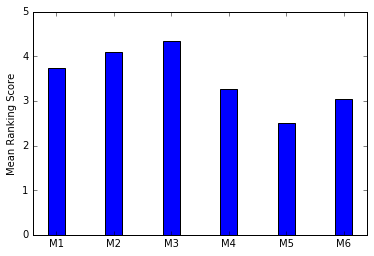

In [13]:
ind = np.arange(6)
width = 0.3

plt.bar(ind,ranking_means,width)
plt.ylabel("Mean Ranking Score")
plt.xticks((ind+0.15),('M1', 'M2', 'M3', 'M4', 'M5', 'M6'))
plt.margins(0.05,0)
plt.ylim(0,5)
plt.show()

Since these are the averaged ranking as provided by the survey takers. The lower the mean ranking the better the viewers felt the movie was.

Based off the ranking scores, M5 or "Star Wars: Episode V The Empire Strikes Back" was regarded by the viewers as the best film in the Star Wars film series. M3 on the other hand which is "Star Wars: Episode III Revenge of the Sith" was regarded the worst amongst the 6 films.

#### Does being the highest rated film also equate to being the most watched?

In the previous graph, "Star Wars: Episode V The Empire Strikes Back" was determined to be the highest rated of the 6 films. But, does being the highest rated also mean it was watched/viewed the most ?

In [16]:
movie_views = star_wars.iloc[:,3:9].sum()
movie_views

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

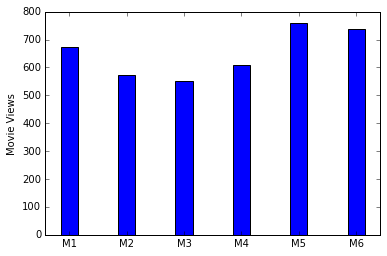

In [18]:
ind = np.arange(6)
width = 0.3

plt.bar(ind,movie_views,width)
plt.ylabel("Movie Views")
plt.xticks((ind+0.15),('M1', 'M2', 'M3', 'M4', 'M5', 'M6'))
plt.margins(0.05,0)
plt.ylim(0,800)
plt.show()

"Star Wars: Episode V The Empire Strikes Back" slightly edges out "Star Wars: Episode VI Return of the Jedi" as the most watched movie in the franchise amongst the survey takers.

#### Does gender influence how viewers feel/rate the Star Wars franchise?

Splitting the dataset into male and female responders should help in identifying the similarities between the male and female fandom. 

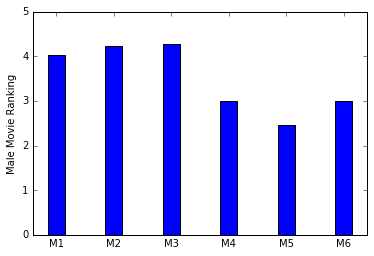

In [32]:
male_viewers = star_wars[star_wars["Gender"] == "Male"]
male_ranking_means = male_viewers.iloc[:,9:15].mean()
male_movie_views = male_viewers.iloc[:,3:9].sum()

ind = np.arange(6)
width = 0.3

plt.bar(ind,male_ranking_means,width)
plt.ylabel("Male Movie Ranking")
plt.xticks((ind+0.15),('M1', 'M2', 'M3', 'M4', 'M5', 'M6'))
plt.margins(0.05,0)
plt.ylim(0,5)
plt.show()

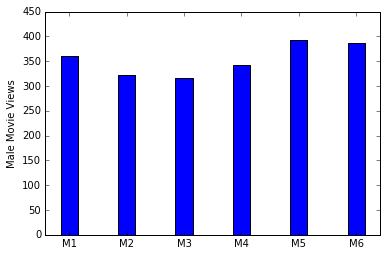

In [31]:
ind = np.arange(6)
width = 0.3

plt.bar(ind,male_movie_views ,width)
plt.ylabel("Male Movie Views")
plt.xticks((ind+0.15),('M1', 'M2', 'M3', 'M4', 'M5', 'M6'))
plt.margins(0.05,0)
plt.ylim(0,450)
plt.show()

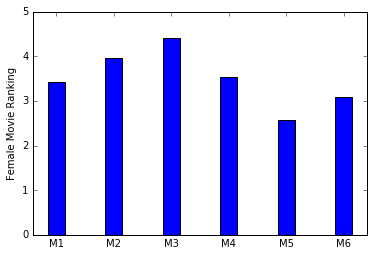

In [29]:
female_viewers = star_wars[star_wars["Gender"] == "Female"]
female_ranking_means = female_viewers.iloc[:,9:15].mean()
female_movie_views = female_viewers.iloc[:,3:9].sum()

ind = np.arange(6)
width = 0.3

plt.bar(ind,female_ranking_means,width)
plt.ylabel("Female Movie Ranking")
plt.xticks((ind+0.15),('M1', 'M2', 'M3', 'M4', 'M5', 'M6'))
plt.margins(0.05,0)
plt.ylim(0,5)
plt.show()

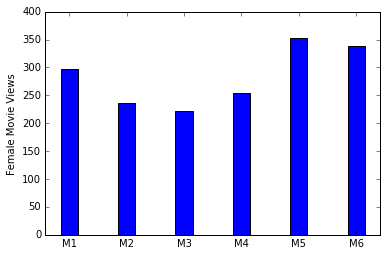

In [34]:
ind = np.arange(6)
width = 0.3

plt.bar(ind,female_movie_views,width)
plt.ylabel("Female Movie Views")
plt.xticks((ind+0.15),('M1', 'M2', 'M3', 'M4', 'M5', 'M6'))
plt.margins(0.05,0)
plt.ylim(0,400)
plt.show()

Looking at the mean movie rankings, Male audience feels strongly about the new trilogy and rates it quite poorly in contrast to the original trilogy, female movie goers were more accepting.

The average number of view counts per film by men who took the survey was ~350 while that number feel to ~300 for women.